In [56]:
#Dataset is from
#https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [5]:
!unzip \*.zip && rm *.zip

Archive:  all_train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
!ls

 2023-01-07_2015_submission.csv   heart.csv		  sampleSubmission.csv
 all_state			  house_test		  submission.csv
 all_test_v2.csv.zip		  house_train		  test.csv
 all_train.csv.zip		  __MACOSX		  test_features.csv
 Chronic_Kidney_Disease.rar	  model_rf_rs_80	  train.csv
 data_description.txt		  ndtv_data_final.csv	  train_features.csv
 dataset.gsheet			  o2Saturation.csv	  train_labels.csv
 df1_loan.csv			  onehr.data		 'Untitled document.gdoc'
'eqint_tsqp (1).gsheet'		  predictions.csv	  water_potability.csv
 eqint_tsqp.gsheet		  README.docx
 gender_submission.csv		  sample_submission.csv


In [8]:
def wrangle(filepath):
  heart = pd.read_csv('heart.csv')

  heart.rename(columns = {'cp':'chest_pain_type', 'trtbps':'resting_heart_beat','chol':'cholestoral','fbs':'fasting_blood_sugar_>_120',
  'restecg':'resting_electrocardiographic',
  'thalachh':'maximum_heart_rate_achieved', 'exng':'exercise_induced_angina',
  'oldpeak':'Previous_Peak','slp':'slope','caa':'number_of_major_vessels','thall':'Thal_rate'}, inplace=True)

  return heart


In [9]:
ox = pd.read_csv('o2Saturation.csv')

In [10]:
heart = wrangle('heart.csv')

In [11]:
heart

,age,sex,chest_pain_type,resting_heart_beat,cholestoral,fasting_blood_sugar_>_120,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,Previous_Peak,slope,number_of_major_vessels,Thal_rate,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           303 non-null    int64  
 1   sex                           303 non-null    int64  
 2   chest_pain_type               303 non-null    int64  
 3   resting_heart_beat            303 non-null    int64  
 4   cholestoral                   303 non-null    int64  
 5   fasting_blood_sugar_>_120     303 non-null    int64  
 6   resting_electrocardiographic  303 non-null    int64  
 7   maximum_heart_rate_achieved   303 non-null    int64  
 8   exercise_induced_angina       303 non-null    int64  
 9   Previous_Peak                 303 non-null    float64
 10  slope                         303 non-null    int64  
 11  number_of_major_vessels       303 non-null    int64  
 12  Thal_rate                     303 non-null    int64  
 13  outpu

## Combine heart table and ox table

In [13]:
new_heart= pd.concat((heart, ox),axis = 1, join='inner')

In [91]:
#sns.pairplot(heart)

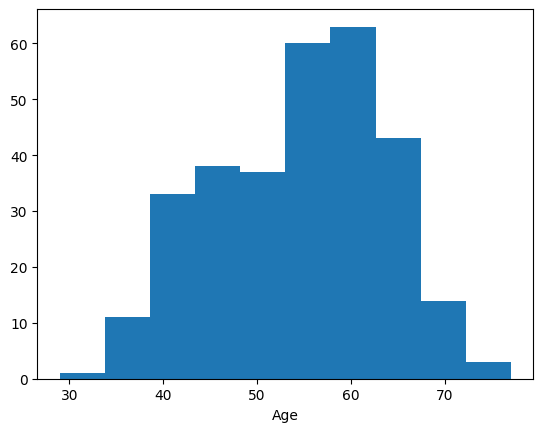

,age
count,303.000000
mean,54.366337
std,9.082101
min,29.000000
25%,47.500000
50%,55.000000
75%,61.000000
max,77.000000


In [123]:
plt.hist(new_heart['age'])
plt.xlabel("Age")
plt.show()
pd.DataFrame(new_heart['age'].describe())

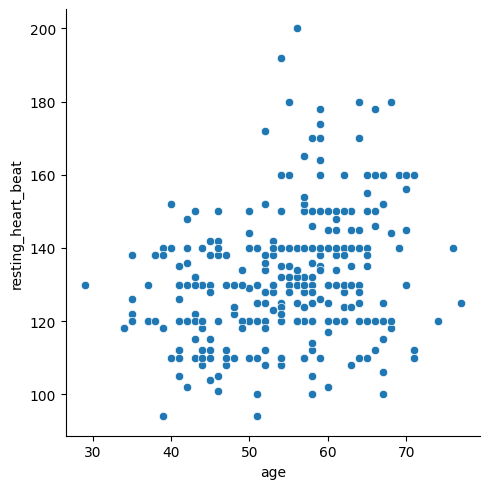

In [134]:
sns.relplot(new_heart, x = 'age', y = 'resting_heart_beat')

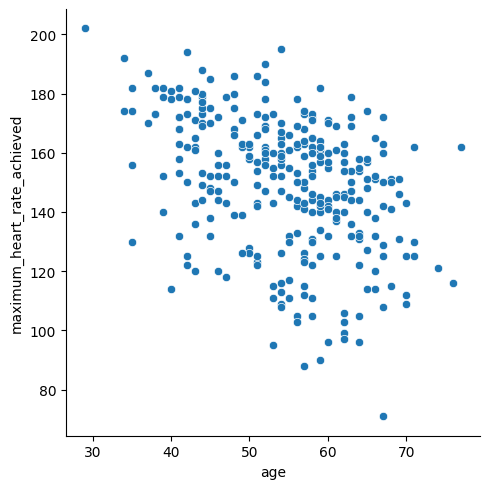

In [86]:
sns.relplot(new_heart, x = 'age', y = 'maximum_heart_rate_achieved')

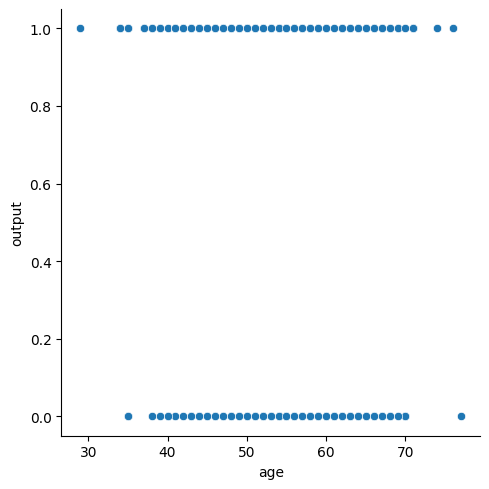

In [87]:
sns.relplot(new_heart, x = 'age', y = 'output')

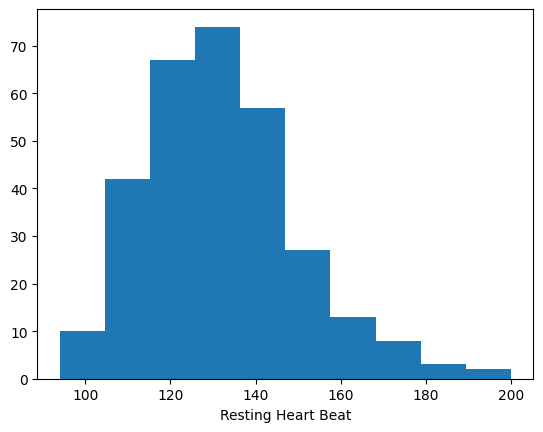

,resting_heart_beat
count,303.000000
mean,131.623762
std,17.538143
min,94.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [125]:
plt.hist(new_heart['resting_heart_beat'])
plt.xlabel('Resting Heart Beat')
plt.show()
pd.DataFrame(new_heart['resting_heart_beat'].describe())

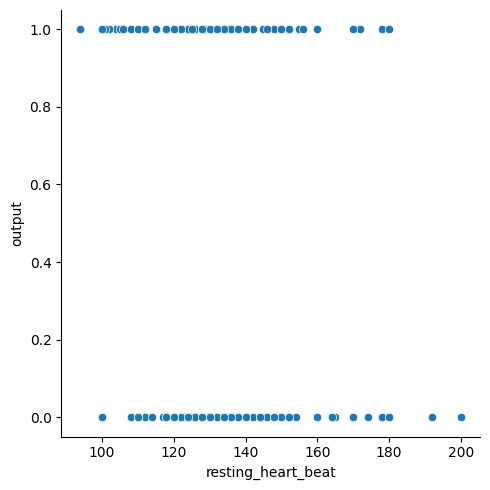

In [61]:
sns.relplot(new_heart, x = 'resting_heart_beat', y='output')
plt.show()

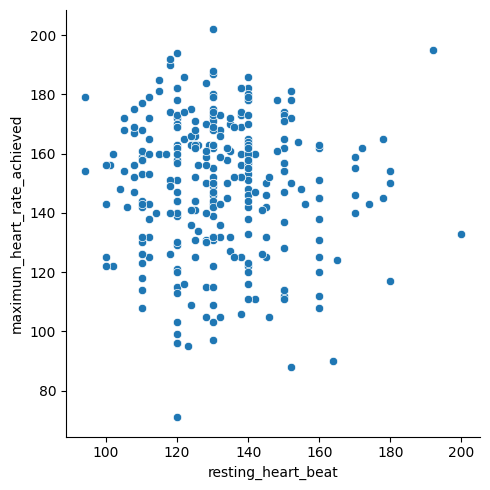

In [63]:
sns.relplot(new_heart, x = 'resting_heart_beat', y = "maximum_heart_rate_achieved")

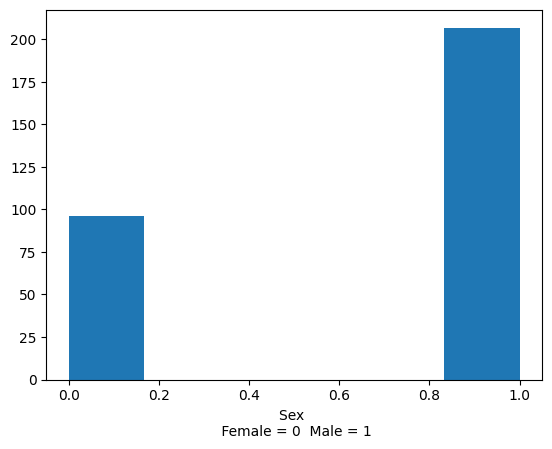

,proportion
sex,
1,0.683168
0,0.316832


In [131]:
plt.hist(new_heart['sex'], bins =6)
plt.xlabel('Sex \n Female = 0  Male = 1')
plt.show()
new_heart['sex'].value_counts(normalize=True)

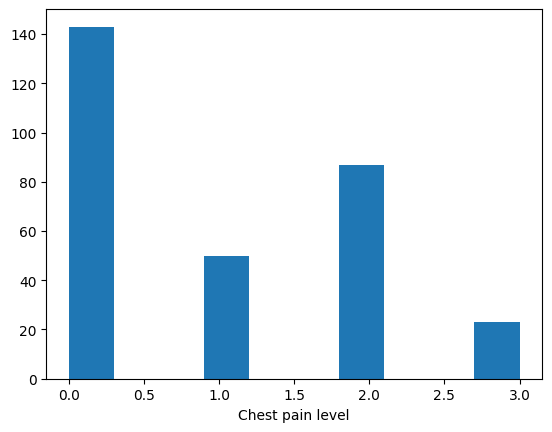

,chest_pain_type
count,303.000000
mean,0.966997
std,1.032052
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


In [126]:
plt.hist(new_heart['chest_pain_type'])
plt.xlabel('Chest pain level')
plt.show()
pd.DataFrame(new_heart['chest_pain_type'].describe())

(array([ 12.,  73., 106.,  69.,  35.,   3.,   4.,   0.,   0.,   1.]),
 array([126. , 169.8, 213.6, 257.4, 301.2, 345. , 388.8, 432.6, 476.4,
        520.2, 564. ]),
 <BarContainer object of 10 artists>)

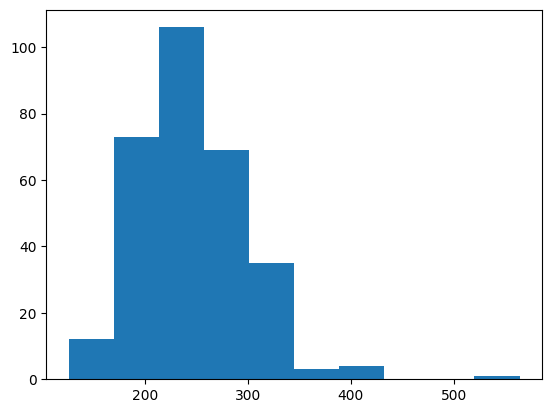

In [130]:
plt.hist(new_heart['cholestoral'])


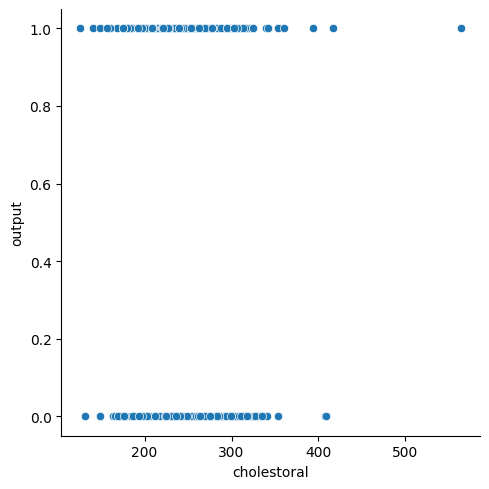

,cholestoral
count,303.000000
mean,246.264026
std,51.830751
min,126.000000
25%,211.000000
50%,240.000000
75%,274.500000
max,564.000000


In [128]:
sns.relplot(new_heart, x = 'cholestoral', y='output')
plt.show()
pd.DataFrame(new_heart['cholestoral'].describe())

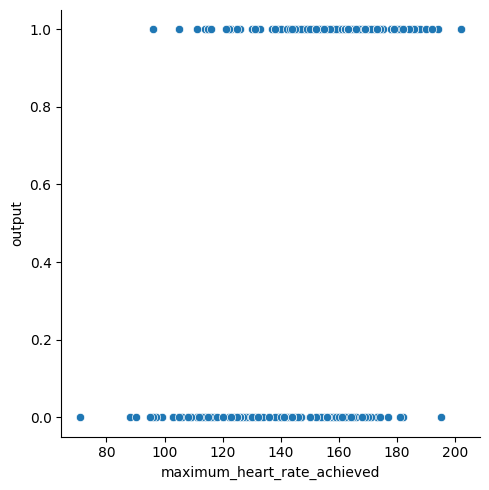

In [133]:
sns.relplot(new_heart, x = 'maximum_heart_rate_achieved', y = 'output')
plt.show()

## Define Target

In [14]:
target = 'output'
X = new_heart.drop(columns = target)
y =new_heart[target]

In [15]:
y_pred = [y.mean()] *len(y)
mean_absolute_error(y,y_pred)

0.49602980099990196

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

model_rf = RandomForestClassifier(random_state=0)

model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

# Model Recall Score

In [33]:
y_pred = model_rf.predict(X_test)


mean_absolute_error(y_test,y_pred)

0.17105263157894737

In [34]:
recall_score(y_test, y_pred)

0.8780487804878049

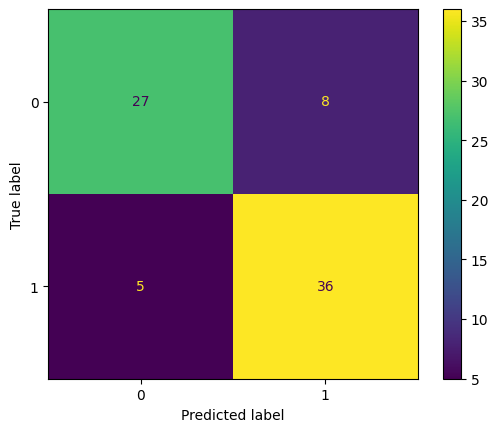

In [36]:
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)

## Tune model

In [37]:
clf = make_pipeline(
    RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100)
)

param_grid = {'randomforestclassifier__max_depth':range(5,40,5),
              'randomforestclassifier__n_estimators':range(25,125,25)}

model = RandomizedSearchCV(clf, param_distributions=param_grid, n_jobs=-1,
                           verbose=1, n_iter=25,cv=5)

model.fit(X,y)

model.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_jobs=-1,
                                        random_state=42))])

In [38]:
model_rf2 = RandomForestClassifier(max_depth = 5, n_estimators=75, n_jobs=1, random_state=42)

model_rf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=75, n_jobs=1, random_state=42)

In [39]:
pred2 = model_rf2.predict(X_test)

In [40]:
print("Model mean absolute error",mean_absolute_error(y_test, pred2))

Model mean absolute error 0.15789473684210525


In [41]:
print("Recall score", recall_score(y_test, pred2))

Recall score 0.9024390243902439


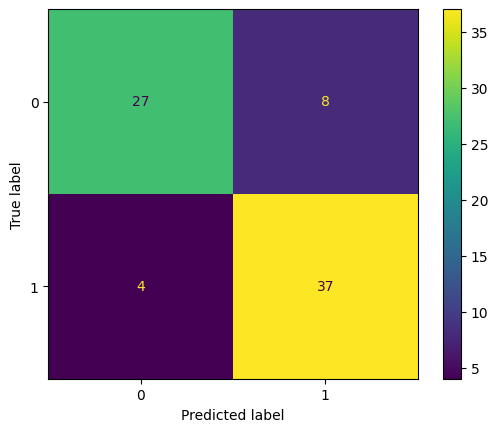

In [42]:
ConfusionMatrixDisplay.from_estimator(model_rf2, X_test, y_test)

In [ ]:
comp_table = [pd.DataFrame(pred2),pd.DataFrame(y_test)]
comp_df = pd.concat(comp_table, axis=1, join='inner')
comp_df.rename(columns = {0:"Acutal Results", 'output': "Predicted Results"}, inplace = True)
display(comp_df)

,Acutal Results,Predicted Results
5,1,1
7,0,1
9,1,1
17,0,1
24,1,1
25,1,1
33,0,1
42,1,1
45,0,1
46,0,1


(12, 2)

## Feature Permutation

In [ ]:
perm_imp = permutation_importance(model_rf2,X,y, random_state=42)

data_perm = {'imp_mean':perm_imp['importances_mean'],
             'imp_std':perm_imp['importances_std']}
df_perm = pd.DataFrame(data_perm, index=X_test.columns).sort_values('imp_mean')

In [ ]:
display(df_perm)

,imp_mean,imp_std
fasting_blood_sugar_>_120,0.001320,0.001617
resting_electrocardiographic,0.007261,0.002470
resting_heart_beat,0.011881,0.004477
slope,0.013201,0.004667
sex,0.013861,0.008707
cholestoral,0.014521,0.004939
exercise_induced_angina,0.015182,0.001617
98.6,0.015182,0.001617
age,0.017162,0.002470
maximum_heart_rate_achieved,0.021122,0.007976
